In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import ttest_rel




In [2]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [3]:
alternate_color = False
simple_minerva_label = False


inclu_DCC = False
method_name = "Tuned PCA corr."
fixed_method_name = "Fixed PCA corr."
key ="agp_bmi_kmer"# "gibbons_otu"   #"MINERVA_grid_t2d_calibrate" 
#  "gibbons_kmer"    "gibbons_otu"    "tom_"  "thomas" "agp_abx_otu" "agp_abx_kmer" "agp_bmi_otu" "agp_bmi_kmer"
subfile = ""
select_columns_bool = False
shortened_shortened = False
trans_vec = True
add_linmodel_type = False




if "calibrate" in key:
    numPc = [0,1,2,3,4,5,6,7,8,9]

    if "t2d" in key:
        
        phen = ["bin_t2d"  for i in range(len(numPc))]
        phen_pretty = "Type II diabetes status"
        folder_names = ["T2D_k7" for i in range(0,len(numPc))]
        limit_spec =(0.4,0.9)
        
    elif "gibbons_kmer" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "CRC (CRC-16S)"
        folder_names = ["CRC_k7" for i in range(0,len(numPc))]
        limit_spec =(0.55,0.95)
        
    elif "gibbons_otu" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "CRC (CRC-16S OTUs)"
        folder_names = ["CRC_otu" for i in range(0,len(numPc))]
        limit_spec =(0.55,0.95)
        
    elif "thomas" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "CRC \n (CRC-WGS 7-mers)"
        folder_names = ["Thomas_k7" for i in range(0,len(numPc))]
        limit_spec =(0.52,0.92)
        
    elif "tom_" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc)+1)]
        phen_pretty = "CRC \n (CRC-WGS OTUs)"
        folder_names = ["CRC_thomas_otu" for i in range(0,(len(numPc)+1))]
        limit_spec =(0.52,0.92)
    elif "hispanic" in key:
        phen = ["antibiotic"  for i in range(len(numPc))]
        phen_pretty = "Antibiotic history (HCHS/SOL)"
        folder_names = ["Hispanic_k7" for i in range(0,len(numPc))]
        limit_spec =(0.5,0.81)   
        
    elif "abx_kmer" in key:
        phen = ["bin_antibiotic_last_year"  for i in range(len(numPc))]
        phen_pretty = "abx (6-mer)"
        folder_names = ["AGP_max_k6" for i in range(0,len(numPc))]
        limit_spec =(0.57,0.7)
    
    elif "abx_otu" in key:
        phen = ["bin_antibiotic_last_year"  for i in range(len(numPc))]
        phen_pretty = "abx (OTU)"
        folder_names = ["AGP_complete_otu" for i in range(0,len(numPc))]
        limit_spec =(0.57,0.7)
    
    elif "bmi_kmer" in key:
        phen = ["bmi_corrected"  for i in range(len(numPc))]
        phen_pretty = "BMI (5-mer)"
        folder_names = ["AGP_max_k5" for i in range(0,len(numPc))]
        limit_spec =(-0.12,0.30)
    elif "bmi_otu" in key:
        phen = ["bmi_corrected"  for i in range(len(numPc))]
        phen_pretty = "BMI (OTU)"
        folder_names = ["AGP_complete_otu" for i in range(0,len(numPc))]
        limit_spec =(-0.12,0.30)
    
        
        
    if any(x in key for x in ["t2d","gibbons","thomas","hispanic","agp_abx","tom"]):
        metric_word = "auc_all"
        chosen_classifier = "Random Forest"
        title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
        phen_type = "class"
    elif "bmi" in key:
        metric_word = "pearson"
        chosen_classifier = ""
        title = 'Pearson for prediction of ' + phen_pretty #' #AUC for prediction of antibiotic history' #
        phen_type = "pred"
     
    select_columns_bool = True
    if simple_minerva_label:
        select_labels = numPc #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
   
    else:
        select_labels = numPc#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    file_names =['MINERVA_grid_PC' + str(numPc[i]) for i in range(0,len(numPc))]
    
    pair_test_all = False
    shortened=True
    not_rotate=True
    trans_vec = False
    trans =  ["clr_scale" for i in range(0,len(numPc))]
    
#     if "tom_" in key:
#         select_labels = ["raw"] + numPc#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
#         file_names =["raw_grid"] + ['MINERVA_grid_PC' + str(numPc[i]) for i in range(0,len(numPc))]
#         trans_vec = True
#         trans = ["none"] + ["clr_scale" for i in range(0,len(numPc))]
        
else:
    
    numPc = [0,0,0,0,0,0,0] 
    
    if "t2d" in key:

        phen = ["bin_t2d"  for i in range(len(numPc))]
        phen_pretty = "Type II diabetes status"
        folder_names = ["T2D_k6","T2D_k6","T2D_k6","T2D_k6","T2D_k7","T2D_k7"]
        limit_spec =(0.4,1)

    elif "gibbons_kmer" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "CRC \n (k-mers CRC-16S)"
        folder_names = ["CRC_k7" for i in range(0,len(numPc))]
        limit_spec =(0.52,1.0)
        file_names = ['raw_grid',"domaincorr_grid",'ComBat_grid','limma_grid','bmc_grid','MINERVA_grid_PC3','MINERVA_grid_PC1'] 

    elif "gibbons_otu" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "CRC \n (OTU CRC-16S)"
        folder_names = ["CRC_otu" for i in range(0,len(numPc))]
        limit_spec =(0.52,1.0)
        file_names = ['raw_grid',"domaincorr_grid",'ComBatlogscale_grid','limma_grid','bmc_grid','MINERVA_grid_PC3','MINERVA_grid_PC2'] 


    elif "thomas" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "CRC \n (k-mers CRC-WGS)"
        folder_names = ["Thomas_k7","Thomas_k7","Thomas_k6","Thomas_k6","Thomas_k6","Thomas_k7","Thomas_k7"]
        limit_spec =(0.53,0.93)
        file_names = ['raw_grid',"domaincorr_grid",'ComBat_grid','limma_grid','bmc_grid','MINERVA_grid_PC33','MINERVA_grid_PC3'] 


#     elif "thoma_v_otu" in key:
#         numPc = [0,0,0,0,0,0,0,0] 
#         phen = ["bin_crc_normal"  for i in range(len(numPc))]
#         phen_pretty = "colorectal cancer status (Thomas et al.)"
#         folder_names = ["CRC_thomas_otu","CRC_thomas_otu","Thomas_k7","Thomas_k6","Thomas_k6","Thomas_k6","Thomas_k7","Thomas_k7"]
#         limit_spec =(0.5,1)
    elif "tom_" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "CRC \n (OTUs CRC-WGS)"
        #folder_names = ["CRC_thomas_otu","CRC_thomas_otu","Thomas_k7","Thomas_k6","Thomas_k7","Thomas_k7"]
        folder_names = ["CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu", "CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu"]
        limit_spec =(0.53,0.93)
        file_names = ['raw_grid',"domaincorr_grid",'ComBatlogscale_grid','limma_grid','bmc_grid','MINERVA_grid_PC3','MINERVA_grid_PC2'] 



    elif "tomLODO" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "CRC (Thomas et al.)"
        folder_names = ["CRC_thomas_otu","CRC_thomas_otu","Thomas_k7","Thomas_k6","Thomas_k7"]
        limit_spec =(0.3,1)

    elif "tomDC" in key:
        phen = ["bin_crc_normal","bin_crc_normal","bin_crc_normal","bin_crc_adenomaORnormal","bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]
        phen_pretty = "CRC (Thomas et al.)"
        folder_names = ["CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu"]
        limit_spec =(0.3,1)

    elif "hispanic" in key:
        phen = ["antibiotic"  for i in range(len(numPc))]
        phen_pretty = "Antibiotic history (HCHS/SOL)"
        folder_names = ["Hispanic_k6","Hispanic_k6","Hispanic_k6","Hispanic_k6","Hispanic_k7","Hispanic_k7"]
        limit_spec =(0.5,0.9)




    elif "agp_bmi_kmer" in key:

        phen = ["bmi_corrected"  for i in range(len(numPc))]
        phen_pretty = "BMI \n (k-mers AGP)"
        folder_names = ["AGP_max_k5" for i in range(len(phen))]
        limit_spec = (-0.06,0.33)#(-0.003,0.081) #(-0.06,0.33)
        file_names = ['raw_grid',"domaincorr_grid",'ComBat_grid','limma_grid','bmc_grid','MINERVA_grid_PC3','MINERVA_grid_PC1'] 

    elif "agp_bmi_otu" in key:
        phen = ["bmi_corrected"  for i in range(len(numPc))]
        phen_pretty = "BMI \n (OTUs AGP)"
        folder_names = ["AGP_complete_otu" for i in range(len(phen))]
        limit_spec =(-0.06,0.33) #(-0.003,0.081) #(-0.06,0.33)
        file_names = ['raw_grid',"domaincorr_grid",'ComBat_grid','limma_grid','bmc_grid','MINERVA_grid_PC3','MINERVA_grid_PC8'] 

    elif "agp_abx_kmer" in key:

        phen = ["bin_antibiotic_last_year"  for i in range(len(numPc))]
        phen_pretty = "antibiotic history \n (k-mers AGP)"
        folder_names = ["AGP_max_k6","AGP_max_k7","AGP_max_k6","AGP_max_k6","AGP_max_k6","AGP_max_k6","AGP_max_k6"]
        limit_spec =(0.585,0.72)
        file_names = ['raw_grid',"domaincorr_grid",'ComBat_grid','limma_grid','bmc_grid','MINERVA_grid_PC3','MINERVA_grid_PC1'] 
    elif "agp_abx_otu" in key:
   
        phen = ["bin_antibiotic_last_year"  for i in range(len(numPc))]
        phen_pretty = "antibiotic history \n (OTUs AGP)"
        folder_names = ["AGP_complete_otu" for i in range(len(phen))]
        limit_spec =(0.585,0.72)
        file_names = ['raw_grid',"domaincorr_grid",'ComBat_grid','limma_grid','bmc_grid','MINERVA_grid_PC3','MINERVA_grid_PC2'] 


if any(x in key for x in ["t2d","gibbons","thoma","hispanic","tom","abx"]):
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    phen_type = "class"
elif "bmi" in key:
    metric_word = "pearson"
    chosen_classifier = ""
    title = 'Pearson for prediction of ' + phen_pretty #' #AUC for prediction of antibiotic history' #
    phen_type = "pred"

    #select_labels = ["Before","ComBat","limma","BMC","CLR","PC Correction\n (PC 1)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    select_labels = ["Before","ComBat","limma","BMC","PC Correction\n (PC 1)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#

if "calibrate" not in key:
    select_columns_bool = True

    pair_test_all = False
    shortened=True
    not_rotate=False
    trans_vec = True
    #trans = ["none","none","none","none","none","clr_scale","clr_scale"]


    print("HELLO")

    if "gibbons_kmer" in key:
        print("H4")
        trans = ["none","none","none","none","none","clr_scale","clr_scale"]

        select_labels = ["Uncorrected","DCC","ComBat","limma","BMC",fixed_method_name,method_name] #(method_name + " (PC 1)")]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#


    elif "gibbons_otu" in key:

        trans = ["none","none","logscale","none","none","clr_scale","clr_scale"]

        select_labels = ["Uncorrected","DCC","ComBat","limma","BMC",fixed_method_name,method_name]#(method_name + " (PC 1-2)")]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#


    elif "tom_" in key:
        print("H3")

        trans = ["none","none","logscale","none","none","clr_scale","clr_scale"]

        select_labels = ["Uncorrected","DCC","ComBat","limma","BMC",fixed_method_name ,method_name]# + " (PC 1-2)")]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#



    elif "thomas" in key:
        print("H2")
        trans = ["none","none","none","none","none","clr_scale","clr_scale"]

        select_labels = ["Uncorrected","DCC","ComBat","limma","BMC",fixed_method_name,method_name]# + " (PC 1-3)")]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#



    elif "agp_abx_otu" in key:
        print("H1")
        trans = ["none","none","logscale","none","none","clr_scale","clr_scale"]

        select_labels = ["Uncorrected","DCC","ComBat","limma","BMC",fixed_method_name,method_name]# + " (PC 1-2)")]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#


    elif "agp_abx_kmer" in key:
        print("HE")
        #trans = ["none","none","none","none","clr_scale"]
        #select_labels = ["Uncorrected","ComBat","limma","BMC",(method_name + "\n (PC 1)")]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
        trans = ["none","none","none","none","none","clr_scale","clr_scale"]

        select_labels = ["Uncorrected","DCC","ComBat","limma","BMC",fixed_method_name ,method_name]# + " (PC 1)")]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#



    elif "agp_bmi_otu" in key:
        print("HE")
        trans = ["none","none","logscale","none","none","clr_scale","clr_scale"]

        select_labels = ["Uncorrected","DCC","ComBat","limma","BMC",fixed_method_name ,method_name] # + " (PC 1-8)")]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    elif "agp_bmi_kmer" in key:

        trans = ["none","none","none","none","none","clr_scale","clr_scale"]

        select_labels = ["Uncorrected","DCC","ComBat","limma","BMC",fixed_method_name ,method_name] # + " (PC 1)")]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#


    else:
        print("NO")
        select_labels = ["Uncorrected","ComBat","limma","BMC","CLR","PC Correction\n (PC 1)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#


lin_model = "reg"
if not trans_vec:
    trans = ["clr_scale" for i in range(len(file_names))]
data_type = "kmer"

file_names = [file_names[f] + "_trans_" + trans[f] for f in range(len(file_names))]
nice_names = ["7" + '-mer' for i in range(len(numPc))]

if phen_type == "cont" or phen_type == "pred":
    
    metric_word = 'pearson' # 'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bmi_prediction' #'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier = 'Regression'# "Random Forest"##"Random Forest"#'Regression'#"Random Forest"
    classifier_ofc = "Lin"
    title = 'Pearson correlation of ' + phen_pretty# 'AUC for prediction of antibiotic history'#'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 
    sq_pearson = False
else:
    #'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier_ofc = "Mixed"
    classifier = [chosen_classifier for f in file_names]#"Naive Bayes"#""Naive Bayes"#Random Forest"#Random Forest"#"#'Regression'#"Random Forest"

    #title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 
    sq_pearson = False
 

HELLO


In [4]:
trans_vec


True

In [5]:
trans

['none', 'none', 'none', 'none', 'none', 'clr_scale', 'clr_scale']

In [6]:
df_metric = pd.DataFrame()

In [7]:
simple_minerva_label

False

In [8]:

for f in range(len(file_names)):
    
    if metric_word == 'pearson':
        if add_linmodel_type:
            
            filename_temp = data_folder + folder_names[f] +"/" + subfile + data_type + "_BatchCorrected_" + phen[f] + "_"+ file_names[f] + "_lin_model_" + lin_model +"_pearson_and_mse.pkl"
        
        else:
            # "_lin_model_" + lin_model +
            filename_temp = data_folder + folder_names[f] +"/" + subfile + data_type + "_BatchCorrected_" + phen[f] + "_"+ file_names[f] + "_pearson_and_mse.pkl"
        
    else:
        
        filename_temp = data_folder + folder_names[f] + "/" +subfile + data_type + "_BatchCorrected_"+ phen[f] + "_" + file_names[f] + "_classification_auc.pkl"
    print(filename_temp)
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()]) 
        
        if metric_word == "auc_all" or metric_word == "accuracy":
            index = folder_names[f] + file_names[f] + phen[f]
            #index = folder_names[f]
            #index = nice_names[f] + "_first_" + str(numPc[f])
            
            if "agp_abx" in key:
                
                df_metric[index] = pd.Series(data_temp[file_names[f]][classifier[f]][metric_word][0:13])
            else:
                if file_names[f] == 'MINERVA_grid_PC33_trans_clr_scale':
                    df_metric[index] = pd.Series(data_temp['MINERVA_grid_PC3_trans_clr_scale'][classifier[f]][metric_word])
                else:
                    df_metric[index] = pd.Series(data_temp[file_names[f]][classifier[f]][metric_word])
            #nice_names[f] + "_first_" + str(numPc[f])
        else:
            #index = folder_names[f] + file_names[f]
            index = file_names[f]
            df_metric[index] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        print(file_names[f])
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_raw_grid_trans_none_pearson_and_mse.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_domaincorr_grid_trans_none_pearson_and_mse.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_ComBat_grid_trans_none_pearson_and_mse.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_limma_grid_trans_none_pearson_and_mse.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_bmc_grid_trans_none_pearson_and_mse.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_MINERVA_grid_PC3_trans_clr_scale_pearson_and_mse.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_MINERVA

In [9]:
file_names[f]

'MINERVA_grid_PC1_trans_clr_scale'

In [10]:
import numpy as np
import scipy
#delta = np.array(df_metric.iloc[:,4]-df_metric.iloc[:,0])
#print(np.mean(delta))
#print(scipy.stats.sem(delta))
#df_metric

In [11]:
#df_metric.sum(axis=1)
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

In [12]:
file_names

['raw_grid_trans_none',
 'domaincorr_grid_trans_none',
 'ComBat_grid_trans_none',
 'limma_grid_trans_none',
 'bmc_grid_trans_none',
 'MINERVA_grid_PC3_trans_clr_scale',
 'MINERVA_grid_PC1_trans_clr_scale']

In [13]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
#select_labels = ["raw","ComBat","BMC","limma","SmartSVA","Refactor","MINERVA"]
#select_labels = numPc
#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

In [14]:

if sq_pearson:
    df_metric = np.power(df_metric,2)

1
0.3179001585177209
2
2.3932262933306496e-13
3
0.3173779675652713
4
0.326715702979795
5
3.030155419766963e-18
meh
6
3.825157127190396e-37


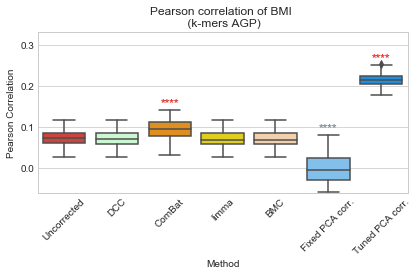

In [15]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only




# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
sns.set_style("whitegrid")
#sns.set_theme("whitegrid")
if select_columns_bool:
    
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    if not_rotate:
        
        current_palette = sns.color_palette()
        #sns.palplot(current_palette)
        #palette = sns.cubehelix_palette(df_metric.shape[1])
        palette = sns.color_palette("Blues", df_metric.shape[1])
        plot_color = ["#ABB2B9"] + palette.as_hex()[1:]
        
        
        
        g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
        g.set_xticklabels(labels = select_labels) #df_metric.columns
    else:
        
        
        current_palette = sns.color_palette()
        #sns.palplot(current_palette)
        #palette = sns.cubehelix_palette(df_metric.shape[1])
        if not alternate_color:
            #palette = sns.color_palette("Reds", df_metric.shape[1]-1)
            #plot_color = palette.as_hex()[::-1] + ["#0093FF"]#["#01d3e8"]
            
            #palette = sns.color_palette("Reds", 2)
            #reds_color = palette.as_hex()[1:2]
            
            #palette = sns.color_palette("Oranges", df_metric.shape[1]-2)
            #oranges_color = palette.as_hex()
            
            #plot_color = reds_color + oranges_color +["#0093FF"]
            
            #plot_color['#808B96','#F2F4F4',]
            #plot_color =['#e32f27','#FF9300','#FFE800','#fdd0a2',"#72C1FC","#0093FF"]
            #plot_color =['#e32f27','#FF9300','#FFE800','#fdd0a2',"#0093FF"]
            plot_color =['#e32f27',"#C3FFCE",'#FF9300','#FFE800','#fdd0a2',"#72C1FC","#0093FF"]
            if inclu_DCC:
                #plot_color =['#e32f27','#FF9300','#FFE800','#fdd0a2',"#C3FFCE","#72C1FC","#0093FF"]

                plot_color =['#e32f27','#FF9300','#FFE800','#fdd0a2',"#C3FFCE","#72C1FC","#0093FF"]
            if "otu_v_something" in key:
                plot_color =['#e32f27',"#C3FFCE"]
            
#             if "_v_" in key:
#                 plot_color =['#e32f27',"#72C1FC",'#e32f27','#FF9300','#FFE800','#fdd0a2',"#72C1FC","#0093FF"]
                
        else:
            palette1 = sns.color_palette("Reds", 2) [::-1] 
            palette2 = sns.color_palette("Blues", 2)
            plot_color = palette1.as_hex() + palette2.as_hex()
            
        g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
        g.set_xticklabels(rotation=45,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
g.set(ylim=limit_spec)

g.set_title(title)

# box_line_col = ["#808B96","#808B96","#808B96","#808B96","#808B96","#000000","#000000"]

# for i,box_col in enumerate(box_line_col):
#     mybox = g.artists[i]
#     mybox.set_edgecolor(box_col)


#g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
  
# box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
#                                       (df_metric.columns[0], df_metric.columns[2]),
#                                       (df_metric.columns[0], df_metric.columns[3]),
#                                       (df_metric.columns[0], df_metric.columns[4])]
# for a,b in box_pairs:
#     print(a,b)
#     t_stat = scipy.stats.ttest_rel(df_metric[a],df_metric[b], axis=0, nan_policy='propagate')
#     print(t_stat.pvalue)
#     if t_stat.pvalue < 0.05:
#         ax.text(x=1, y=1, s=asterisk[0], va='center') 

if not_rotate:
    
    ref_col = np.tile(df_metric.iloc[:,0], (df_metric.shape[1], 1))#[df_metric.iloc[:,0]]
    tick_vec = g.get_xticks()[1:]
    
else:
    
    #ref_col = np.tile(df_metric.iloc[:,5], (5, 1))#[df_metric.iloc[:,4]]
    #tick_vec = g.get_xticks()[:-1]
    
    #if "_v_" in key:
    ref_col = np.tile(df_metric.iloc[:,0], (5, 1))#[df_metric.iloc[:,4]]
    if any (short_key in key for short_key in ["gibbons_kmer","gibbons_otu","thomas" ,
                                               "tom_","agp_abx_otu","agp_abx_kmer","agp_bmi_otu",
                                              "agp_bmi_kmer"] ):

        ref_col = np.append(np.tile(df_metric.iloc[:,0], (4, 1)),[df_metric.iloc[:,1],df_metric.iloc[:,0]],0)
    #tick_vec = g.get_xticks()[:-1]
    tick_vec = g.get_xticks()[1:]
        
    
    
    #ref_col = np.tile(df_metric.iloc[:,4], (4, 1))
    #ref_col = np.vstack([ref_col, df_metric.iloc[:,0]])
    #tick_vec = g.get_xticks()
    
old_system = False
if old_system:
    asterisk = ["ns","*","**","***","****",""]
else:
    asterisk = ["*","**","***","****",""] # new


vertical_offset = 0.01 #0.05
for xtick_ind in range(len(tick_vec)):
    asterisk_color = '#e32f27'
    #print(xtick_ind)
   
    
    
    xtick = tick_vec[xtick_ind]
    print(xtick)
    
    compare_col = df_metric.iloc[:,xtick]
    median = np.max(compare_col)
    
    
    t_res = ttest_rel(ref_col[xtick_ind], compare_col,nan_policy ='omit')
    p = t_res.pvalue
    print(p)
    
    if p > 5.00e-02 and p <= 1.00e+00:
        if old_system:
            asterisk_index = 0
        else:
            asterisk_index = 4
    
    
    
    elif 1.00e-02 < p  and p <= 5.00e-02:
        
        if old_system:
            asterisk_index = 1
        else:
            asterisk_index = 0
        
    elif 1.00e-03 < p and p <= 1.00e-02:
        asterisk_index = 1
        
        if old_system:
            asterisk_index = 2
        else:
            asterisk_index = 1
    elif 1.00e-04 < p <= 1.00e-03:
        if old_system:
            asterisk_index = 3
        else:
            asterisk_index = 2
    elif p <= 1.00e-04:
        if old_system:
            asterisk_index = 4
        else:
            asterisk_index = 3
    else:
        if old_system:
            asterisk_index = 5
        else:
            asterisk_index = 4
        
    
#     if p < 5.00e-02  and not_rotate and np.nanmean(ref_col[xtick_ind]) < np.nanmean(compare_col):
#         print("meh")
#         if old_system:
#             asterisk_index = 5
#         else:
#             asterisk_color = "#808B96"
#     if p < 5.00e-02  and not not_rotate and np.nanmean(ref_col[xtick_ind]) > np.nanmean(compare_col):
#         print("meh")
#         if old_system:
#             asterisk_index = 5
#         else:
#             asterisk_color = "#808B96"
    if p < 5.00e-02  and np.nanmean(ref_col[xtick_ind]) > np.nanmean(compare_col):
        print("meh")
        if old_system:
            asterisk_index = 5
        else:
            asterisk_color = "#808B96"
        
    #print(asterisk_index)
    #print(asterisk[asterisk_index] )
        
        
        
        
#     if not_rotate:
#         g.text(xtick,median + vertical_offset,asterisk[asterisk_index], 
#             horizontalalignment='center',size='large',color="#808B96",weight='semibold')
#     else:
        
#         g.text(xtick,median + vertical_offset,asterisk[asterisk_index], 
#             horizontalalignment='center',size='large',color=asterisk_color,weight='semibold') #	 #"#0093FF"
    
    g.text(xtick,median + vertical_offset,asterisk[asterisk_index], 
            horizontalalignment='center',size='large',color=asterisk_color,weight='semibold') #	 #"#0093FF"
    


#g.yaxis.grid(False)
if metric_word== "pearson":
    g.set(xlabel="Method", ylabel = "Pearson Correlation")
    if sq_pearson:
        g.set(xlabel="Method", ylabel = "Squared Pearson")
else:
    if not_rotate:
        if "otu_v_kmer" in key:
            g.set(xlabel="Data type", ylabel = "AUC")
        elif "otu_v_something" in key:
            g.set(xlabel="Methods", ylabel = "AUC")
        else:
            g.set(xlabel="Number of PCs", ylabel = "AUC")
    else:
        g.set(xlabel="Method", ylabel = "AUC")



#
plt.rc('figure', titlesize=25)# controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15) 
plt.rc('font', size=12) 

plt.tight_layout()
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] +  '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')
plt.show()





In [16]:
ref_col = np.append(np.tile(df_metric.iloc[:,0], (4, 1)),[df_metric.iloc[:,1],df_metric.iloc[:,0]],0)

In [17]:
test = np.tile(df_metric.iloc[:,0], (5, 1))

In [18]:
ref_col.shape

(6, 50)

In [19]:
xtick_ind = 3
np.nanmean(ref_col[xtick_ind]) > np.nanmean(compare_col)

False

In [20]:
#np.repeat(ref_col, 4)

test = np.tile(ref_col, (4, 1))
#np.append(test,df_metric.iloc[:,4],axis=1)





In [28]:
0.216/0.073


2.9589041095890414

In [21]:
df_metric.mean(axis=0)

raw_grid_trans_none                 0.073342
domaincorr_grid_trans_none          0.073032
ComBat_grid_trans_none              0.095226
limma_grid_trans_none               0.072997
bmc_grid_trans_none                 0.073010
MINERVA_grid_PC3_trans_clr_scale    0.000002
MINERVA_grid_PC1_trans_clr_scale    0.216380
dtype: float64

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ComBat_grid_trans_none v.s. limma_grid_trans_none: t-test paired samples with Bonferroni correction, P_val=8.596e-13 stat=9.772e+00
raw_grid_trans_none v.s. limma_grid_trans_none: t-test paired samples with Bonferroni correction, P_val=6.348e-01 stat=1.010e+00


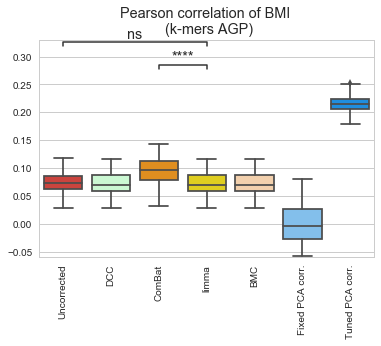

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")


x = "Method"
y = "AUC"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df_metric,palette=plot_color)
sns.set_context("paper", font_scale=1.5) 
sns.set_style("whitegrid")
if pair_test_all:
    if shortened:
        if shortened_shortened:
            add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[2], df_metric.columns[3])],
                        test='t-test_ind', text_format='star', loc='outside', verbose=2)
        else:
            if key == 'Gibbons':
                add_stat_annotation(ax, data=df_metric,
                            box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                      (df_metric.columns[0], df_metric.columns[2]),
                                      (df_metric.columns[0], df_metric.columns[3]),
                                      (df_metric.columns[0], df_metric.columns[4]),
                                       (df_metric.columns[1], df_metric.columns[4])],
                            test='t-test_ind', text_format='star', loc='outside', verbose=2)
            elif "Thomas" in key:
                add_stat_annotation(ax, data=df_metric,
                            box_pairs=[(df_metric.columns[0], df_metric.columns[1])],
                            test='t-test_ind', text_format='star', loc='outside', verbose=2)
            else:
                add_stat_annotation(ax, data=df_metric,
                            box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                      (df_metric.columns[0], df_metric.columns[2]),
                                      (df_metric.columns[0], df_metric.columns[3]),
                                      (df_metric.columns[0], df_metric.columns[4])],
                            test='t-test_ind', text_format='star', loc='outside', verbose=2)

    else:
        add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[0], df_metric.columns[4]),
                                  (df_metric.columns[0], df_metric.columns[5]),
                                  (df_metric.columns[0], df_metric.columns[6])],
                        test='t-test_ind', text_format='star', loc='outside', verbose=2)

else:
    add_stat_annotation(ax, data=df_metric,
                    box_pairs=[(df_metric.columns[2], df_metric.columns[3]),
                              (df_metric.columns[0], df_metric.columns[3])],
                    test='t-test_paired', text_format='star', loc='outside', verbose=2)
# , (df_metric.columns[0], df_metric.columns[5])
if not_rotate:
    ax.set_xticklabels(labels = select_labels,fontsize= 13)
else:
    ax.set_xticklabels(rotation=90,labels = select_labels)
#ax.set_yticklabels(fontsize= 10)
ax.set(ylim=limit_spec)
ax.set_title(title)
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '_2.pdf',bbox_inches='tight')
#(df_metric.columns[0], df_metric.columns[2]),
#                              (df_metric.columns[0], df_metric.columns[3]),
#                             (df_metric.columns[0], df_metric.columns[4]),
#                             (df_metric.columns[0], df_metric.columns[5])

In [23]:
shortened

True

In [24]:
np.mean(np.array(df_metric.sum(axis=0)))

4.314203317799687

In [25]:
test = df_metric.sum(axis=0)
        
    
    
    

In [26]:
test

raw_grid_trans_none                  3.667083
domaincorr_grid_trans_none           3.651614
ComBat_grid_trans_none               4.761280
limma_grid_trans_none                3.649828
bmc_grid_trans_none                  3.650510
MINERVA_grid_PC3_trans_clr_scale     0.000099
MINERVA_grid_PC1_trans_clr_scale    10.819011
dtype: float64

In [27]:
sum(np.isnan(df_metric.sum(axis=0)))

0